# An Analysis of Motorcycle Part Sales

![Bikes](bikes.jpg)

## 📖 Background
You work in the accounting department of a company that sells motorcycle parts. The company operates three warehouses in a large metropolitan area.

You’ve recently learned data manipulation and plotting, and suggest helping your colleague analyze past sales data. Your colleague wants to capture sales by payment method. She also needs to know the average unit price for each product line.

## Objective

In our analysis, these are the main questions we want to answer:

1. What are the total sales for each payment method?
2. What is the average unit price for each product line?
3. What is the average purchase value by client type?
4. What is the total purchase value by product line?

# Contents:

### I. Wholesale vs Retail Buying Habits
* Total Sales by Payment Method
* Number of Transactions by Client Type
* Average Purchase Amount by Client Type
* Total Sales by Client Type
### II. Product Line Information
* Average Unit Price by Product Line
* Total Sales by Product Line

### III. Busy Places and Times
* Number of Transactions per Warehouse
* Average Sales Per Weekday
* Daily Sales 
* Average Sales Per Weekday by Client Type
* Daily Sales by Client Type

### IV. Summary

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# set preferred seaborn settings 
sns.set_theme()
sns.set_context("notebook")

# Reading in the sales data
df = pd.read_csv('data/sales_data.csv', parse_dates=['date'])

# Take a look at the first datapoints
df.head()

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment
0,2021-06-01,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card
1,2021-06-01,North,Retail,Breaking system,9,19.29,173.61,Cash
2,2021-06-01,North,Retail,Suspension & traction,8,32.93,263.45,Credit card
3,2021-06-01,North,Wholesale,Frame & body,16,37.84,605.44,Transfer
4,2021-06-01,Central,Retail,Engine,2,60.48,120.96,Credit card


## 💾 The data

#### The sales data has the following fields:
- "date" - The date, from June to August 2021.
- "warehouse" - The company operates three warehouses: North, Central, and West.
- "client_type" - There are two types of customers: Retail and Wholesale.
- "product_line" - Type of products purchased.
- "quantity" - How many items were purchased.
- "unit_price" - Price per item sold.
- "total" - Total sale = quantity * unit_price.
- "payment" - How the client paid: Cash, Credit card, Transfer.

# I. Wholesale vs Retail Buying Habits

We start by finding the total of all transactions in our table, catagorized by payment type. This allows us to start discovering the spending habits of our clients.

payment
Cash            19199.10
Credit card    110271.57
Transfer       159642.33
Name: total, dtype: float64


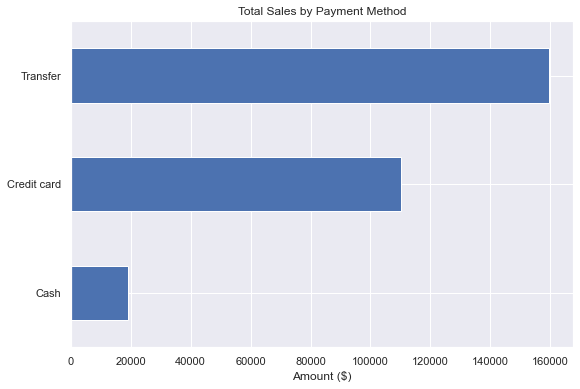

In [ ]:
# Total sales for each payment method
sales_by_payment = df.groupby('payment')['total'].sum()
print(sales_by_payment)

# set up plot
fig, ax = plt.subplots(figsize = (9,6))
ax = sales_by_payment.plot(kind='barh')
ax.set(title='Total Sales by Payment Method', xlabel='Amount ($)', ylabel = '')
plt.show()

Bank transfers make up the majority of sales. This is likely because buisinesses and other wholesale clients buy in bulk, and the large transaction amounts are most conveniently paid using transfers. Additionally, many retail shoppers prefer the convenience of a credit card, which is also an option for smaller wholesale purchases. Next, we look at the total number of transactions between these two groups:

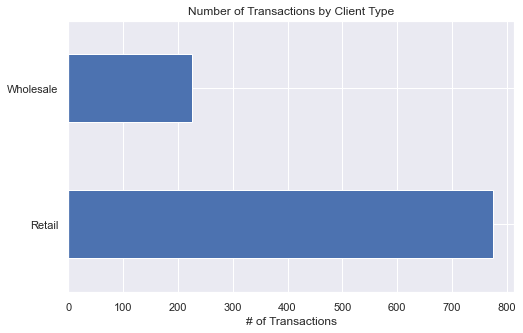

In [ ]:
# group transactions by client type and plot
totals_by_payment_client = df.groupby('client_type')['payment'].count()

plt.subplots(figsize = (8,5))
totals_by_payment_client.plot(kind='barh', xlabel = '', title = 'Number of Transactions by Client Type')
plt.xlabel('# of Transactions')
plt.show()

This shows that wholesale buyers tend to buy less often than retail buyers. This may be true because whosale purchases are usually larger and in bulk amounts. We can verify this with the following plots:

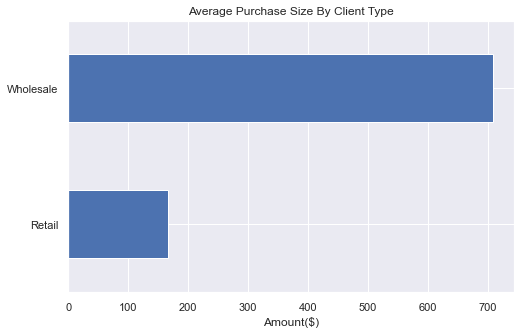

In [ ]:
# plot average purchase by client type
client_avgs = df.groupby('client_type')['total'].mean()

plt.subplots(figsize = (8,5))
client_avgs.plot(kind='barh', xlabel = '', ylabel = '', title = 'Average Purchase Size By Client Type')
plt.xlabel('Amount($)')
plt.show()

We see that the average purchase is much higher for wholesale clients. This agrees with our theory about why wholesale purchases happen less often. Given this, which type of client gives our business the most income?

client_type
Retail       129470.67
Wholesale    159642.33
Name: total, dtype: float64


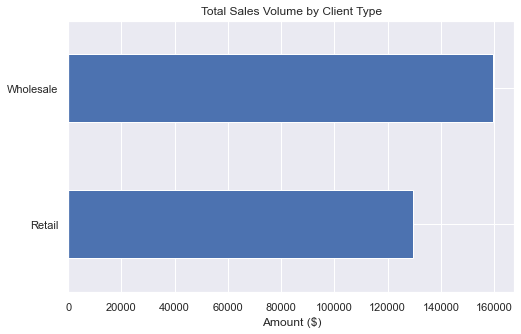

In [ ]:
# plot total volume of sales by client
totals = df.groupby('client_type')['total'].sum()
print(totals)

plt.subplots(figsize = (8,5))
totals.plot(kind='barh', xlabel='', ylabel='Amount ($)', title='Total Sales Volume by Client Type')
plt.xlabel('Amount ($)')
plt.show()

While both types of consumers contribute large amounts of income, wholesale buyers contributed ~$30,000 more than retail for the time period in the data. So, we conclude that wholesale buyers buy in larger quantities, less frequently, and end up making more money for the business than retail buyers.

# II. Product Line Information
Now, we examine the details of our products. We start by looking at the average price of our products by their type:

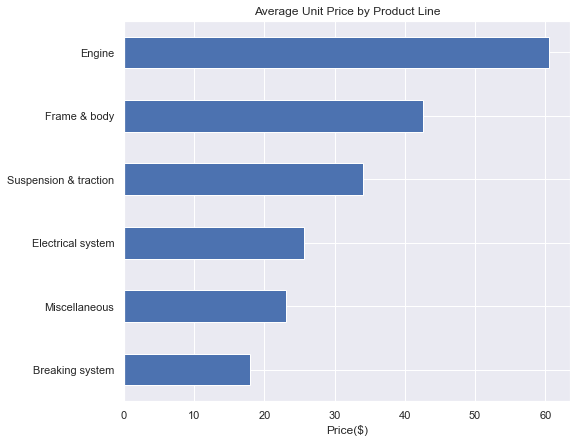

In [ ]:
prod_totals = df.groupby('product_line')['total'].sum()

prod_quantity = df.groupby('product_line')['quantity'].sum()

# Dividing product line totals by quantity, we get our average unit prices
prod_avgs = (prod_totals / prod_quantity).sort_values()

# plot averages
fig, ax = plt.subplots(figsize = (8,7))
ax.set(title = 'Average Unit Price by Product Line',ylabel = 'Price ($)')
plt.xlabel('Price($)')
ax = prod_avgs.sort_values().plot(kind='barh', xlabel = '')
plt.show()

It appears that engine parts are on average the most expensive. We also notice that breaking system parts usually cost the least. Now we examine which product line sold the most overall:

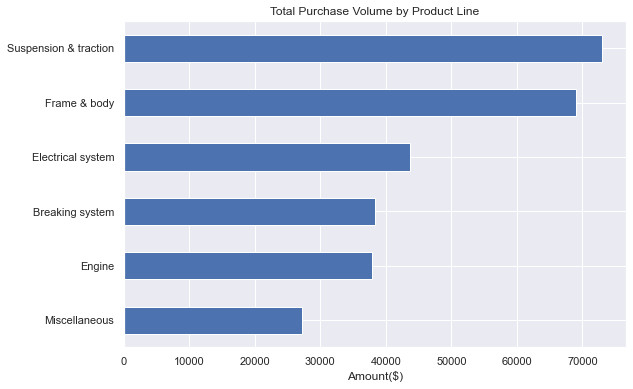

In [ ]:
total_by_prod = df.groupby('product_line')['total'].sum().sort_values()

plt.subplots(figsize = (9,6))
total_by_prod.plot(kind='barh', xlabel = '', ylabel = '', title= 'Total Purchase Volume by Product Line')
plt.xlabel('Amount($)')
plt.show()

While engine parts cost the most on average, the suspention/traction and frame/body product lines generated the most in sales, greatly surpassing the rest of the types. So, we can say that these parts are the most profitable even though they may not be the most expensive individually.

# III. Busy Places and Times
First, we look at the number of transactions by warehouse to get an idea of the busiest locations.

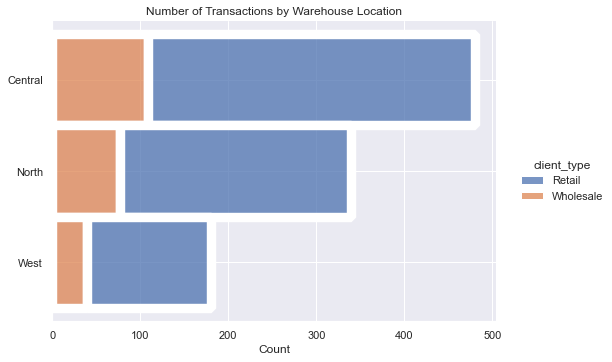

In [ ]:

sns.displot(y='warehouse', hue='client_type',data=df, multiple='stack', height = 5, aspect=1.5)
plt.ylabel('')
plt.title('Number of Transactions by Warehouse Location')
plt.show()

We see that the central warehouse is the most busy, and the west location is the least. Now we look at the busy times of the week.

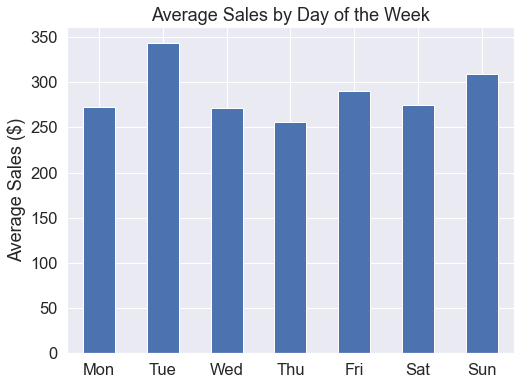

In [ ]:
df['weekday'] = df['date'].dt.weekday

# group sales totals by weekday for plotting
df['weekday'].replace({6:'Sun', 0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat'}, inplace=True)
weekday_totals = df.groupby('weekday')['total'].mean()
weekday_totals = weekday_totals[['Mon','Tue','Wed','Thu','Fri','Sat','Sun']]

# set up plot
plt.subplots(figsize = (8,6))
weekday_totals.plot(kind='bar', title='Average Sales by Day of the Week', ylabel='Average Sales ($)')
plt.xlabel('')
plt.xticks(rotation = 0)
plt.show()

Tuesday is the busiest day, followed by Saturday, and Monday is the least busy day. We can see this trend by also looking at the daily sales over the course of the whole dataset:

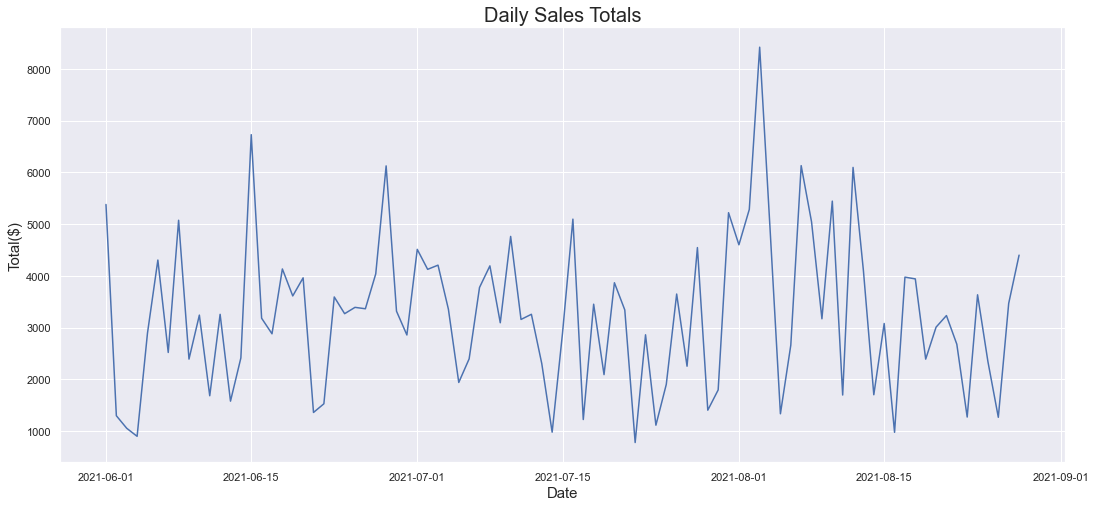

In [ ]:
daily = df.groupby('date')['total'].sum()
daily = daily.to_frame().reset_index()

# set up graph
f, ax = plt.subplots(figsize = (18,8))
ax = sns.lineplot(data=daily, x='date', y='total')
plt.title('Daily Sales Totals', fontsize=20)
plt.ylabel('Total($)', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.show()

This plot shows that daily sales are anywhere from under 1000 to over 8000 dollars. Noting this high variance, we can investigate the habits of wholesale vs retail buyers seperately to find the cause:

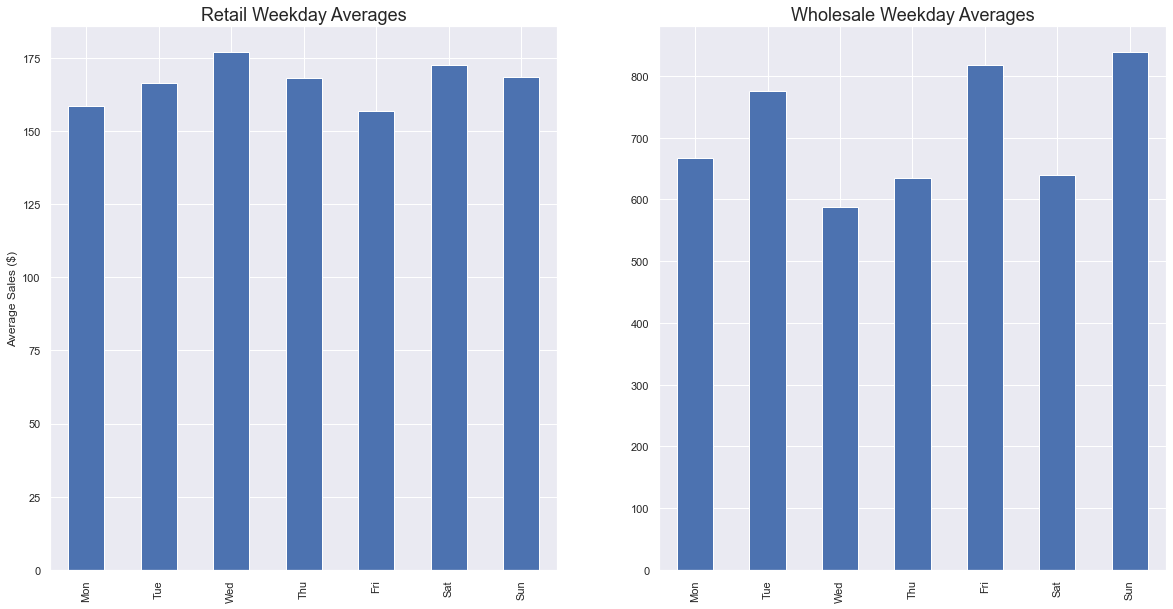

In [ ]:
# create seperate tables for retail and wholesale purchases
retl = df[df['client_type'] == 'Retail']
whlsl = df[df['client_type'] == 'Wholesale']

# create aggregate weekly sales
retl_weekday = retl.groupby('weekday')['total'].mean()
whlsl_weekday = whlsl.groupby('weekday')['total'].mean()

# reorder columns in chronological order
retl_weekday = retl_weekday[['Mon','Tue','Wed','Thu','Fri','Sat','Sun']]
whlsl_weekday = whlsl_weekday[['Mon','Tue','Wed','Thu','Fri','Sat','Sun']]

# graph on two ax objects
f, (ax1, ax2) = plt.subplots(ncols=2,figsize = (20,10))
sns.set(font_scale=1.5)
ax1 = retl_weekday.plot(ax=ax1,kind='bar', title='Retail Weekday Averages', ylabel='Average Sales ($)', xlabel='')
ax2 = whlsl_weekday.plot(ax=ax2, kind='bar', title='Wholesale Weekday Averages', xlabel='')
plt.show()

Here, we see that retail clients buy much more consistently thruought the week. The most and least busy days only vary by ~25 dollars. On the other hand, wholesale averages vary by more than 200 dollars! This may be due to the consistent buying schedules of businesses that resale parts, and just one large client who buys every 7 days can make an impact on weekly sales. These habits are reflected in the following chart:

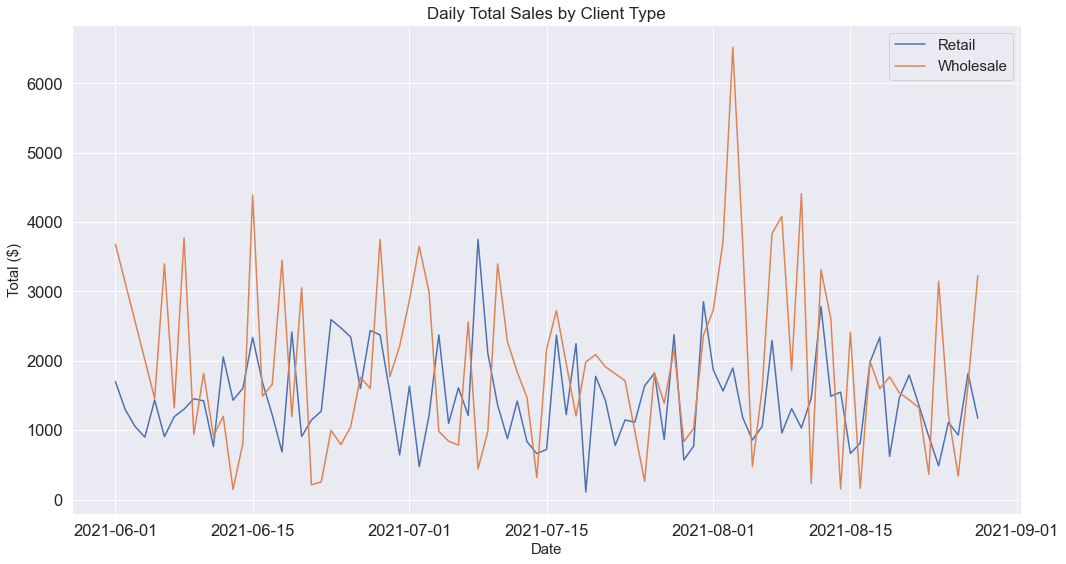

In [ ]:
client_daily = df.groupby(['date', 'client_type'])['total'].sum()
client_daily = client_daily.to_frame().reset_index()

# set up graph
f, ax = plt.subplots(figsize = (17,9))
ax = sns.lineplot(data=client_daily, x='date',y='total',hue='client_type')
ax.set_xlabel('Date', fontsize=15)
ax.set_ylabel('Total ($)', fontsize=15)
ax.set_title('Daily Total Sales by Client Type', fontsize=17)
plt.legend(['Retail', 'Wholesale'], fontsize=15)
plt.show()

Now, we have a clearer picture of shopping habits. As mentioned, retail shoppers provide consistent daily income, while wholesale shoppers provide the bulk of sales through weekly\other periodic purchases. Now, we are ready to summarize our findings and answer our central questions.

# IV. Summary

Again, our analysis is motivated by the following central questions:

1. What are the total sales for each payment method?
2. What is the average unit price for each product line?
3. What is the average purchase value by client type?
4. What is the total purchase value by product line?

After answering these with our visualizations, can take them a step further and outline the overall sales trends using our exploration of the data:

**The company recieves most of its income via bank transfers and credit cards** instead of cash (less than 10%). While wholesale clients purhase less often than retail clients, their purchase size is much bigger. Specifically, **wholesale and retail purchase totals were ~160,000 and ~130,000 dollars, respectively.** Thus, both types of clients are important to the company's operations, even though they are habitually different.

While the most expensive parts on average were engine parts, **the two product lines that generated the most sales were suspension and traction followed by frame and body**. 

**The central warehouse processed the most transactions**, followed by the north and then the west warehouses. **Tuesday was the weekday with the highest average sales**, followed by Sunday and Friday. Retail buyers had consistent sales through the week, and wholesale buyers varied based on weekday, suggesting a weekly buying schedule.

Now, we are ready to make more informed decisions about the company's sales.